## UK Inflation

Author: Julian Moors\
Contact: julian.moors@outlook.com

### Introduction
_Show UK Inflation Rate by yearly, quarterly and monthly time frames_

### Data Dictionary

| Name      | Description                                                                |
| --------- | -------------------------------------------------------------------------- |
| Year      | The year when the data was sampled                                         |
| Period    | The time period sampled (only available for quarterly and monthly periods) |
| Inflation | The rate of inflation of the sampled time period                           | 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

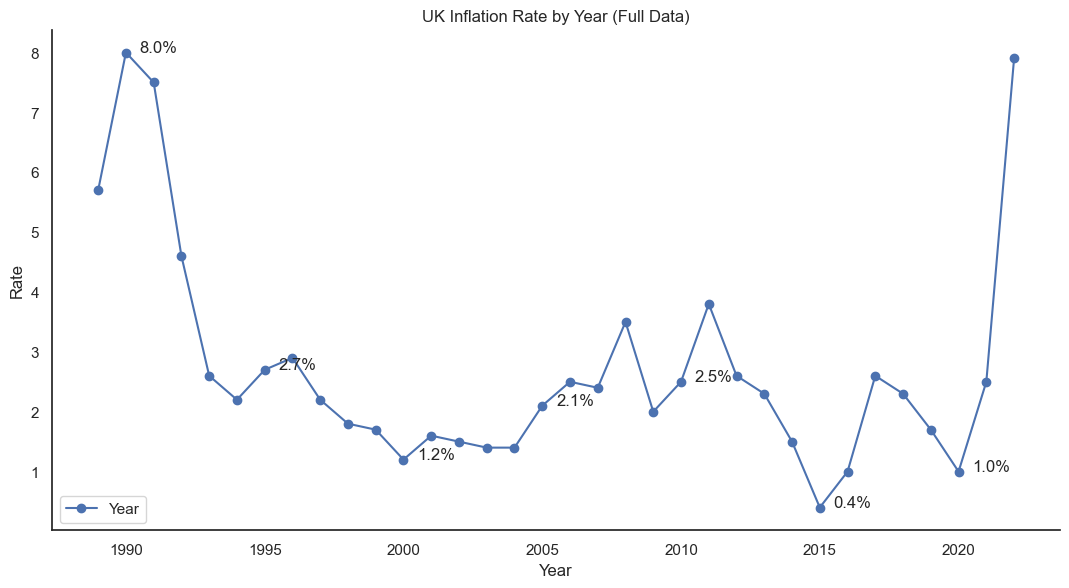

In [2]:
by_year = pd.read_csv('data/uk-inflation-by-year.csv')
year = by_year['Year']
inflation = by_year['Inflation']

fig, ax = plt.subplots(figsize=(13, 6.5))
ax.plot(year, inflation, label='Year', marker='o')
xticks = ax.get_xticks()

for i, txt in enumerate(inflation):
    if year[i] in xticks:
        ax.annotate(f'{txt}%', (year[i], inflation[i]), textcoords="offset points", xytext=(10,0), ha='left')

ax.set_title('UK Inflation Rate by Year (Full Data)')
ax.set_xlabel('Year')
ax.set_ylabel('Rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
plt.grid(False)
plt.show()

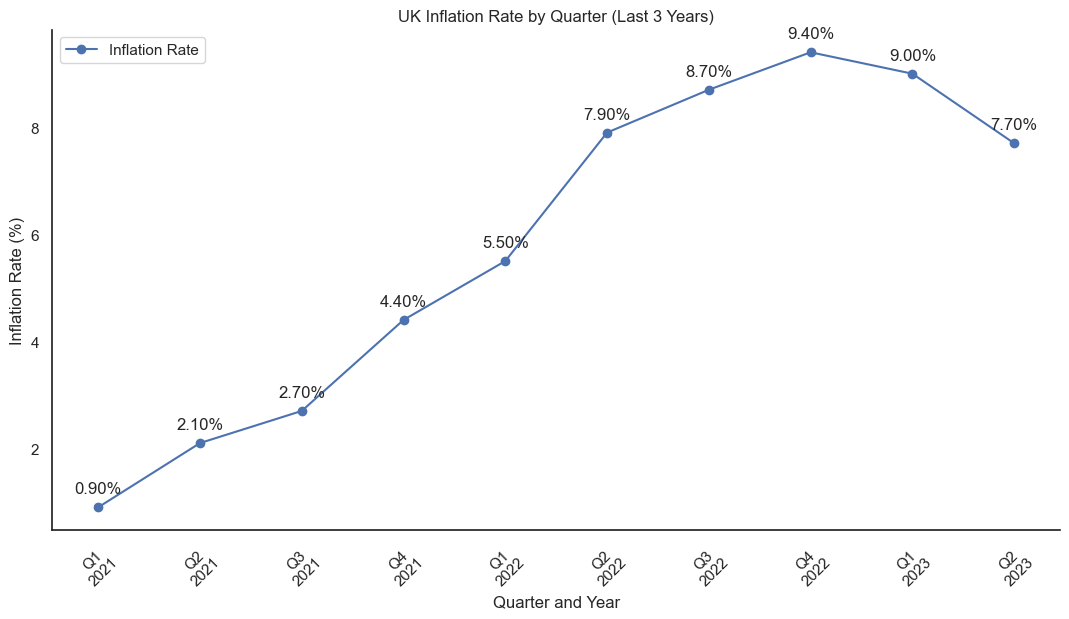

In [3]:
def plot_inflation_by_period(csv_file, period_years):
    by_quarter = pd.read_csv(csv_file)
    by_quarter['Year'] = by_quarter['Year'].astype(int)

    by_quarter = by_quarter.sort_values(by=['Year', 'Quarter']).reset_index(drop=True)

    max_year = by_quarter['Year'].max()
    start_year = max_year - period_years + 1
    
    selected_period = by_quarter[by_quarter['Year'] >= start_year].copy()

    if selected_period.empty:
        print("No data available for the selected period.")
        return

    selected_period['YearQuarter'] = selected_period['Year'].astype(str) + '-Q' + selected_period['Quarter'].astype(str)

    x_labels = [f"{quarter}\n{year}" for year, quarter in zip(selected_period['Year'], selected_period['Quarter'])]

    plt.figure(figsize=(13, 6.5))
    plt.plot(selected_period['YearQuarter'], selected_period['Inflation'], label='Inflation Rate', marker='o')

    for i, inflation in enumerate(selected_period['Inflation']):
        plt.annotate(f"{inflation:.2f}%", (i, inflation), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title(f'UK Inflation Rate by Quarter (Last {period_years} Years)')
    plt.xlabel('Quarter and Year')
    plt.ylabel('Inflation Rate (%)')
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.legend()
    plt.grid(False)
    plt.show()

plot_inflation_by_period('data/uk-inflation-by-quarter.csv', 3)

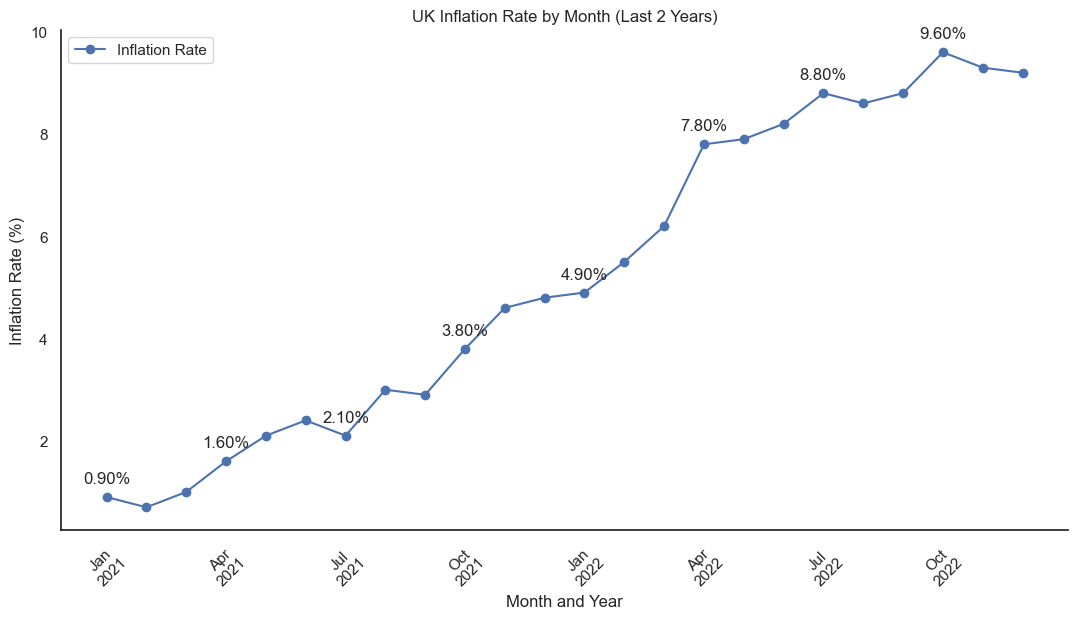

In [4]:
def plot_inflation_by_period_monthly(csv_file, period_years, selected_year):
    by_month = pd.read_csv(csv_file)
    by_month['Year'] = by_month['Year'].astype(int)
    
    start_year = selected_year - period_years + 1

    selected_period = by_month[(by_month['Year'] >= start_year) & (by_month['Year'] <= selected_year)].copy()
    selected_period['Month'] = selected_period['Month'].str.capitalize()

    if selected_period.empty:
        print("No data available for the selected period.")
        return
        
    selected_period['YearMonth'] = selected_period['Year'].astype(str) + '-' + selected_period['Month']

    x_labels = [f"{month[:3]}\n{year}" if i % 3 == 0 else "" 
                for i, (year, month) in enumerate(zip(selected_period['Year'], selected_period['Month']))]

    plt.figure(figsize=(13, 6.5))
    plt.plot(selected_period['YearMonth'], selected_period['Inflation'], label='Inflation Rate', marker='o')

    for i, (label, inflation) in enumerate(zip(x_labels, selected_period['Inflation'])):
        if label:
            plt.annotate(f"{inflation:.2f}%", (i, inflation), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title(f'UK Inflation Rate by Month (Last {period_years} Years)')
    plt.xlabel('Month and Year')
    plt.ylabel('Inflation Rate (%)')
    plt.xticks(ticks=range(len(selected_period['YearMonth'])), labels=x_labels, rotation=45)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.legend()
    plt.grid(False)
    plt.show()

plot_inflation_by_period_monthly('data/uk-inflation-by-month.csv', 2, 2022)